In [139]:
from python_client import PyPoulpeRemoteClient

slave_id = 1
n_axis = 2 # 2 or 3

# Create an instance of the client
client = PyPoulpeRemoteClient("http://127.0.0.1:50098", [slave_id], 0.001)

print(client.get_connected_devices())

# Use client methods
client.turn_on(slave_id)
client.set_torque_limit(slave_id,[0.3]*n_axis)
client.set_velocity_limit(slave_id, [0.3]*n_axis)

([1, 0], ['RightShoulderOrbita2d', 'LeftShoulderOrbita2d'])


In [140]:
client.set_torque_limit(slave_id,[0.3]*n_axis)
client.set_velocity_limit(slave_id, [0.3]*n_axis)
client.set_target_position(slave_id,[0]*n_axis)

In [141]:
import numpy as np
import time


client.set_torque_limit(slave_id,[1.0]*n_axis)
client.set_velocity_limit(slave_id, [1.0]*n_axis)

t0 = time.time()
stop = False
tar, t=[],[]
pos, vel, torque, axis_sensors = [], [], [], []
target = 0
while target < 1.9*2*np.pi:
    target = target+0.002
    client.set_target_position(slave_id,[target]*n_axis)
    time.sleep(0.001)
    t.append(time.time()-t0)
    tar.append(client.get_target_position(slave_id))
    pos.append(client.get_position_actual_value(slave_id))
    vel.append(client.get_velocity_actual_value(slave_id))
    torque.append(client.get_torque_actual_value(slave_id))
    axis_sensors.append(client.get_axis_sensors(slave_id))


while target > 0:
    target = target-0.002
    client.set_target_position(slave_id,[target]*n_axis)
    time.sleep(0.001)
    t.append(time.time()-t0)
    tar.append(client.get_target_position(slave_id))
    pos.append(client.get_position_actual_value(slave_id))
    vel.append(client.get_velocity_actual_value(slave_id))
    torque.append(client.get_torque_actual_value(slave_id))
    axis_sensors.append(client.get_axis_sensors(slave_id))
    
while target < 1.9*2*np.pi:
    target = target+0.002
    client.set_target_position(slave_id,[target, -target])
    time.sleep(0.001)
    t.append(time.time()-t0)
    tar.append(client.get_target_position(slave_id))
    pos.append(client.get_position_actual_value(slave_id))
    vel.append(client.get_velocity_actual_value(slave_id))
    torque.append(client.get_torque_actual_value(slave_id))
    axis_sensors.append(client.get_axis_sensors(slave_id))


while target > 0:
    target = target-0.002
    client.set_target_position(slave_id,[target, -target])
    time.sleep(0.001)
    t.append(time.time()-t0)
    tar.append(client.get_target_position(slave_id))
    pos.append(client.get_position_actual_value(slave_id))
    vel.append(client.get_velocity_actual_value(slave_id))
    torque.append(client.get_torque_actual_value(slave_id))
    axis_sensors.append(client.get_axis_sensors(slave_id))
        
tar = np.array(tar)
vel = np.array(vel)
pos = np.array(pos)
torque = np.array(torque)
axis_sensors = np.array(axis_sensors)
client.set_torque_limit(slave_id,[0.3]*n_axis)
client.set_velocity_limit(slave_id, [0.3]*n_axis)
client.set_target_position(slave_id,[0]*n_axis)

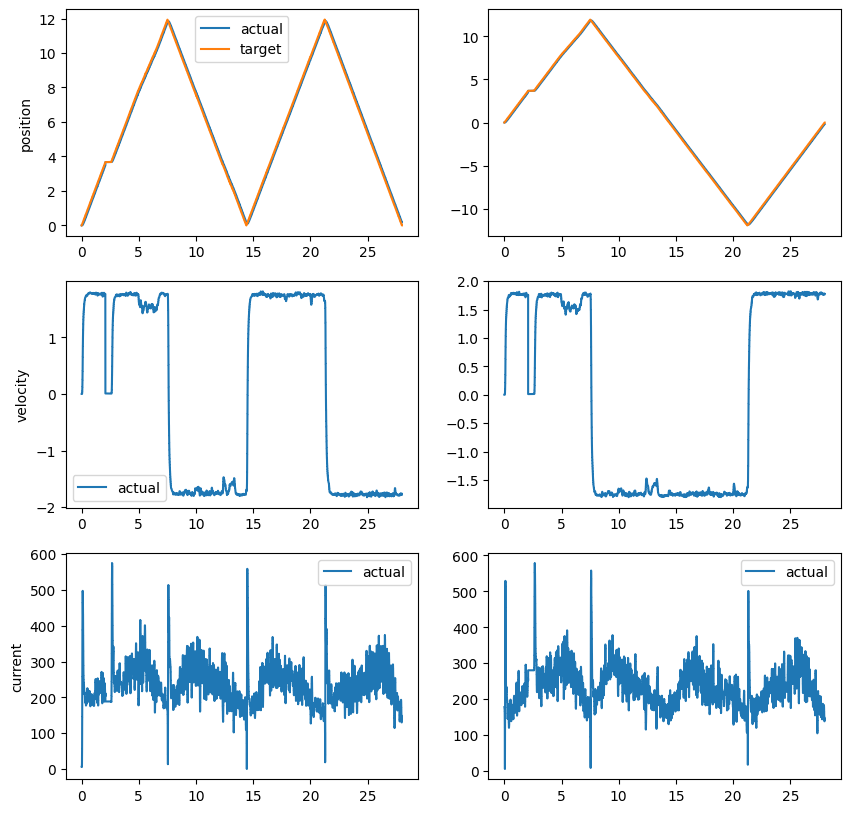

In [142]:
import matplotlib.pyplot as plt
%matplotlib inline


fig, axs = plt.subplots(3,n_axis, figsize=(10,10))

for i, a in enumerate(axs.T):
    a[0].step(t,pos[:,i], label="actual")
    a[0].step(t,tar[:,i], label="target")       
    a[1].step(t,vel[:,i], label = "actual")    
    a[2].step(t,np.abs(torque[:,i]), label = "actual")

for i, a in enumerate(axs[:].T):
    a[0].set_ylabel("position")
    a[0].legend()
    a[1].set_ylabel("velocity")
    a[1].legend()
    a[2].set_ylabel("current")
    a[2].legend()
    break

plt.legend()

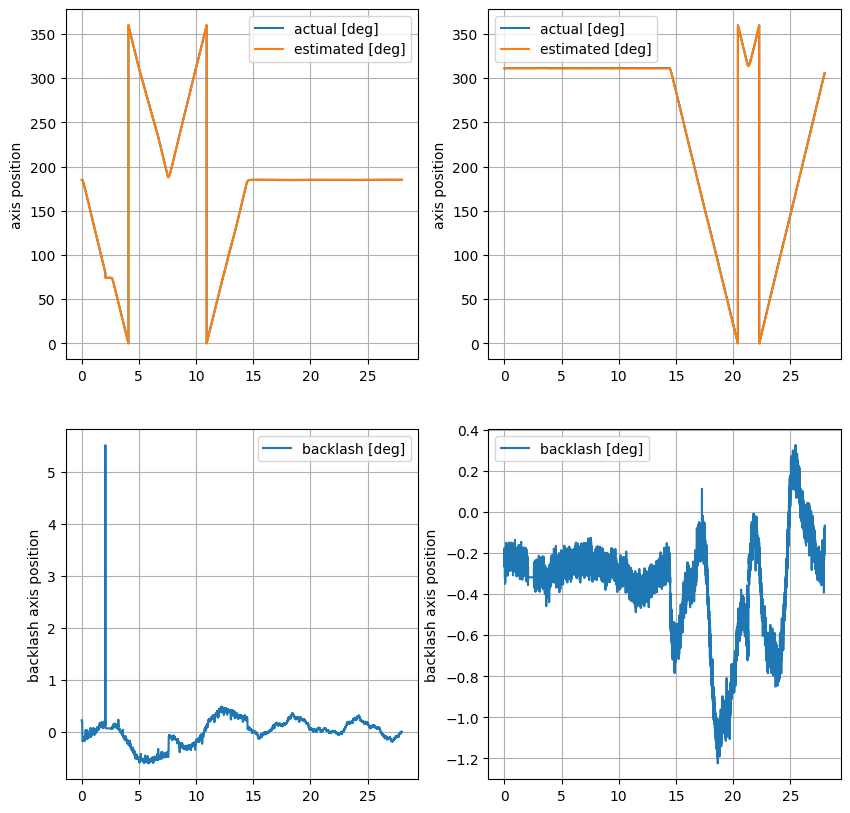

thread 'tokio-runtime-worker' panicked at poulpe_ethercat_grpc/src/client.rs:135:81:
called `Result::unwrap()` on an `Err` value: Status { code: Unknown, message: "h2 protocol error: error reading a body from connection: stream closed because of a broken pipe", source: Some(hyper::Error(Body, Error { kind: Io(Custom { kind: BrokenPipe, error: "stream closed because of a broken pipe" }) })) }


In [143]:
import matplotlib.pyplot as plt
%matplotlib inline

def wrap(angle):
    return (angle + 2 * np.pi) % (2 * np.pi)

orbita_2d_ik_mat = -np.array([[1/(2*1.9), 1/(2*1.9)],[1/(2*1.9),-1/(2*1.9)]])
axis_readings_initial = np.array(client.get_axis_sensors(slave_id)).reshape(-1,1)
axis_calc = (pos@orbita_2d_ik_mat).T + np.array(axis_readings_initial) % (2*np.pi)
axis_calc = (wrap(axis_calc))

axis_error = axis_calc-axis_sensors.T
for i, ax_e in enumerate(axis_error):
    for j,a in enumerate(ax_e):
        if np.abs(a) > np.pi:
            axis_error[i,j] = a - (np.sign(a))*2*np.pi


fig, axs = plt.subplots(2,n_axis, figsize=(10,10))

for i, a in enumerate(axs.T):
    a[0].step(t, np.rad2deg(axis_sensors[:,i]), label = "actual [deg]")
    a[0].step(t, np.rad2deg(axis_calc[i,:]), label = "estimated [deg]")
    a[1].step(t, np.rad2deg(axis_error[i,:]), label = "backlash [deg]")

for i, a in enumerate(axs[:].T):
    a[0].set_ylabel("axis position")
    a[0].legend()
    a[0].grid()
    a[1].set_ylabel("backlash axis position")
    a[1].legend()
    a[1].grid()
    
plt.legend()

In [129]:

t0 = time.time()
stop = False
tar, t=[],[]
pos, vel, torque, axis_sensors = [], [], [], []
n = 0
while n < 2000:
    n = n+1
    time.sleep(0.001)
    t.append(time.time()-t0)
    tar.append(client.get_target_position(slave_id))
    pos.append(client.get_position_actual_value(slave_id))
    vel.append(client.get_velocity_actual_value(slave_id))
    torque.append(client.get_torque_actual_value(slave_id))
    axis_sensors.append(client.get_axis_sensors(slave_id))
        
tar = np.array(tar)
vel = np.array(vel)
pos = np.array(pos)
torque = np.array(torque)
axis_sensors = np.array(axis_sensors)
client.set_torque_limit(slave_id,[0.3]*n_axis)
client.set_velocity_limit(slave_id, [0.3]*n_axis)
client.set_target_position(slave_id,[0]*n_axis)